In [26]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os as os
import seaborn as sns  # visualization tool

import sklearn as sklearn

from IPython.display import HTML, display
from IPython.core.interactiveshell import InteractiveShell
from pandas.api.types import CategoricalDtype

from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV, RepeatedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, auc
from sklearn.feature_selection import SelectFromModel

sns.set(color_codes=True)
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 80) #set options to display all the columns
# pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
sns.set(style="darkgrid")
os.chdir('C:\\Users\\papnejar\\Desktop\\ml-jupyter')
seed = 999
debug=False

In [3]:

import pickle

with open('data.clean.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    Data = pickle.load(f)

In [4]:
with open('data.columns.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    d_columns = pickle.load(f)

In [5]:
with open('data.scaler.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    scaler = pickle.load(f)

In [6]:
with open('data.target.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    target = pickle.load(f)

In [29]:
if debug:
    df = pd.DataFrame(Data, columns=d_columns).sample(7500, random_state=seed)
    target_df = pd.DataFrame(target).sample(7500, random_state=seed)
    Data = df.values 
else:
    df = pd.DataFrame(Data, columns=d_columns)

In [8]:
type(Data)
type(scaler)
type(target)

numpy.ndarray

sklearn.preprocessing.data.MinMaxScaler

pandas.core.series.Series

In [9]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(Data, target, test_size = .3, random_state = seed)

Checking below to see of all the features are present in training and test dataset.

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (17635, 474)
Training Labels Shape: (17635,)
Testing Features Shape: (7559, 474)
Testing Labels Shape: (7559,)


In [11]:
model = RandomForestClassifier()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3,random_state=seed)
parameters = {'n_estimators'  : [20,30,40,50,100,200],
              'bootstrap'     : ['True','False'],
              'max_depth'     : [5,10,20],
              'min_samples_leaf' : [2,5,7]
             }

In [12]:
grid = GridSearchCV(estimator=model, param_grid = parameters, 
                    cv = cv_method, n_jobs=-2,
                    return_train_score=True)
grid.fit(train_features,train_labels.ravel())

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x000001EECD7685C0>,
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'n_estimators': [20, 30, 40, 50, 100, 200], 'bootstrap': ['True', 'False'], 'max_depth': [5, 10, 20], 'min_samples_leaf': [2, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:
# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap='False', class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 The best score across ALL searched params:
 0.42107551271146393

 The best parameters across ALL searched params:
 {'bootstrap': 'False', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}



In [19]:
randomForestClassifierModel = RandomForestClassifier(n_jobs=-2, random_state=seed, bootstrap=False, max_depth= 20, min_samples_leaf= 5, n_estimators= 200)
randomForestClassifierModel.fit(train_features,train_labels.ravel())

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-2,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

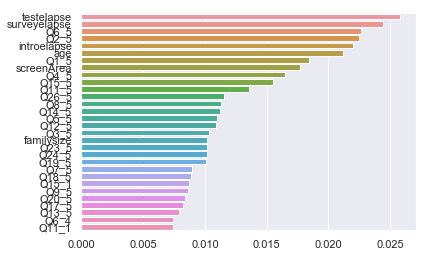

In [37]:
fs_indices_rfi = np.argsort(randomForestClassifierModel.feature_importances_)[::-1][0:30]
best_features_rfi = df.columns[fs_indices_rfi].values
feature_importances_rfi = randomForestClassifierModel.feature_importances_[fs_indices_rfi]
ax = sns.barplot(x=feature_importances_rfi, y=best_features_rfi)

In [39]:
print(best_features_rfi)

['testelapse' 'surveyelapse' 'Q6_5' 'Q2_5' 'introelapse' 'age' 'Q1_5'
 'screenArea' 'Q4_5' 'Q15_5' 'Q11_5' 'Q26_5' 'Q8_5' 'Q14_5' 'Q5_5' 'Q12_5'
 'Q3_5' 'familysize' 'Q23_5' 'Q24_5' 'Q19_5' 'Q7_5' 'Q18_5' 'Q15_1' 'Q9_5'
 'Q20_5' 'Q17_5' 'Q13_5' 'Q6_4' 'Q11_1']


In [42]:
df[best_features_rfi].values

array([[0.0625    , 0.12058824, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.09642857, 0.15588235, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02321429, 0.08333333, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.09017857, 0.21764706, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10357143, 0.19705882, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.05357143, 0.15098039, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [44]:
train_features, test_features, train_labels, test_labels = train_test_split(df[best_features_rfi].values, target, test_size = .3, random_state = seed)

In [46]:
model = RandomForestClassifier()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3,random_state=seed)
parameters = {'n_estimators'  : [20,30,40,50,100,200],
              'bootstrap'     : ['True','False'],
              'max_depth'     : [5,10,20],
              'min_samples_leaf' : [2,5,7]
             }

In [47]:
grid = GridSearchCV(estimator=model, param_grid = parameters, 
                    cv = cv_method, n_jobs=-2,
                    return_train_score=True)
grid.fit(train_features,train_labels.ravel())

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x000001EECF04B470>,
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'n_estimators': [20, 30, 40, 50, 100, 200], 'bootstrap': ['True', 'False'], 'max_depth': [5, 10, 20], 'min_samples_leaf': [2, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap='False', class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 The best score across ALL searched params:
 0.4117002173707589

 The best parameters across ALL searched params:
 {'bootstrap': 'False', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}



In [55]:
target.value_counts()

6    7552
7    6590
5    5925
4    3040
3     846
2     649
1     494
0      98
Name: nerdy, dtype: int64